In [20]:
!what {sys.executable}

/opt/homebrew/opt/python@3.9/bin/python3.9


In [25]:
import mmcv
from mmcv.runner import load_checkpoint
from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [59]:
config = '/Users/blackjacker/code/mmdetection/configs/mask2former/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco.py'
checkpoint = '/Users/blackjacker/Downloads/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_20220504_001756-743b7d99.pth'



In [28]:
config = '/Users/blackjacker/code/mmsegmentation/configs/unet/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes.py'
checkpoint = '/Users/blackjacker/Downloads/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes_20211210_145204-6860854e.pth'


In [81]:
import mmcv
from mmcv.runner import load_checkpoint
from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

config = '~/code/mmdetection/configs/mask2former/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco.py'
checkpoint = '/Users/blackjacker/Downloads/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_20220504_001756-743b7d99.pth'

def get_colors():
    np.random.seed(997)
    colors = np.stack(np.meshgrid(np.arange(0,255),np.arange(0,255),np.arange(0,255)))
    colors = colors.reshape(3,-1).T
    permute_idxs = np.random.permutation(np.arange(colors.shape[0]))
    colors = colors[permute_idxs]
    return colors.astype(np.uint8)

class Mask2Former(torch.nn.Module):
    def __init__(self, weights, config_path, device='cuda:1', threshold = 0.8):
        super().__init__()
        config = mmcv.Config.fromfile(config_path)
        model = build_detector(config.model)
        checkpoint = load_checkpoint(model, weights, map_location=device)
        self.classes = checkpoint['meta']['CLASSES']
        self.threshold = threshold
        model.to(device)
        model.cfg = config
        self.model = model.eval()
        self.colors = get_colors()

    @torch.no_grad()
    def forward(self, image):
        H,W,_ = image.shape
        image_res = cv2.resize(image, (512,512))
        print(image_res.shape)
        class_bboxs, masks = inference_detector(self.model, image_res)
        objects_mask = np.zeros_like(image_res).astype(np.uint8)
        obj_couint = 0
        for idx, class_name in enumerate(self.classes):
            for bbox, mask in zip(class_bboxs[idx], masks[idx]):
                if bbox[-1] < self.threshold:
                    continue
                objects_mask[mask] = self.colors[obj_couint]
                obj_couint += 1
                
        del class_bboxs, masks
        torch.cuda.empty_cache()

        objects_mask = cv2.resize(objects_mask, (W,H))
        return objects_mask

In [82]:
mask_former = Mask2Former(checkpoint, config, device='cpu')

load checkpoint from local path: /Users/blackjacker/Downloads/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_20220504_001756-743b7d99.pth


In [83]:
def read_video_cv2(path):
    cap = cv2.VideoCapture(path)
    all = []
    i = 0
    while cap.isOpened() and i < 1:
        ret, frame = cap.read()
        arr = np.array(frame)
        all.append(arr)
        i += 1
    return np.array(all)

frame = read_video_cv2("/Users/blackjacker/Downloads/pexels-free-videos-854100-1920x1080-25fps.mp4")  

In [84]:
a = mask_former(frame[0])

(512, 512, 3)


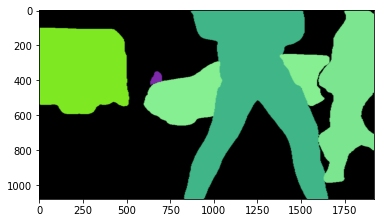

In [85]:
plt.imshow(a)

In [29]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

frame = cv2.resize(frames[0], (1024,512))
model = init_segmentor(config, checkpoint, device='cpu')
result = inference_segmentor(model, frame)

/Users/blackjacker/code/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: /Users/blackjacker/Downloads/fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes_20211210_145204-6860854e.pth


In [4]:
from xmem import PropagationxMem, read_frames

In [5]:
frames = read_frames('/Users/blackjacker/Downloads/data/images')